# Critical Frequency and Rupture Frequency
## Analytical approach

In [3]:
import lammps2d as lmp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.collections as clt
import pandas as pd
import string as st
import scipy.spatial as spp
import scipy.optimize as spo
import sympy as smp
import copy as cp

from IPython.display import HTML

smp.init_printing()
%matplotlib inline
%reload_ext autoreload
%autoreload 2

The maximum angle between two particles is given by $\alpha$
$$\cos(\alpha) = \frac{h-\sigma}{\sigma}$$ 
<img src="AlphaDefinition.png", width = 528px>
where $h$ is the height of the confinement, and $\sigma$ is the particle diameter.

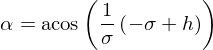

In [4]:
alp, h, sgm = smp.symbols(r'\alpha h \sigma')

expr1 = smp.Eq(smp.cos(alp),(h-sgm)/sgm)
smp.solve(expr1,alp)

expr_alp = smp.Eq(alp, smp.solve(expr1,alp)[1])
expr_alp

The interaction potential between two dipoles is given by:

$$U = -\frac{\mu_0}{4\pi}\frac{3(\vec{m}\cdot\vec{r})^2-r^2m^2}{\left|r\right|^5}$$

Where $r$ is the vector joining the two particles

In [50]:
import sympy.vector as smpv
e = smpv.CoordSys3D('e')
rx, ry, rz, Bx, By, Bz = smp.symbols(r'r_x r_y r_z B_x B_y B_z')

r = rx*e.i + ry*e.j + rz*e.k
B = Bx*e.i + By*e.j + Bz*e.k

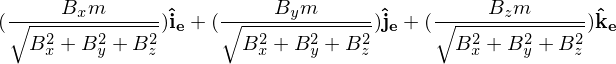

In [48]:
m = smp.symbols(r'm')
m = m*B.normalize()
m

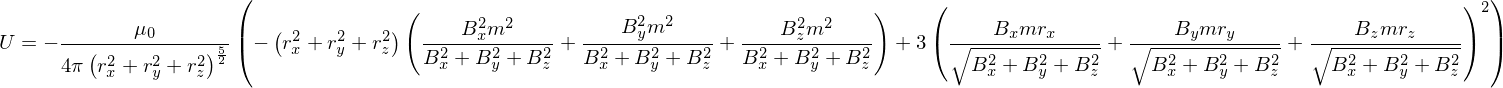

In [115]:
U, mu0 = smp.symbols(r'U \mu_0')
dot = smp.symbols(r'\cdot')
expr_U = smp.Eq(U,-mu0/(4*smp.pi)*(3*m.dot(r)**2-(r.dot(r))*(m.dot(m)))/(r.magnitude()**(5)))

expr_U

In [116]:
al, th, dl, Babs, d, om_p, om_b, t = smp.symbols(r'\alpha \theta \delta B d \omega_p \omega_B t')

smp.Eq(B,B.subs(rx,d*smp.sin(al)*smp.cos(om_p*t))\
        .subs(ry,d*smp.sin(al)*smp.sin(om_p*t))\
        .subs(rz,d*smp.cos(al))\
        .subs(Bx,Babs*smp.sin(th)*smp.cos(om_b*t))\
        .subs(By,Babs*smp.sin(th)*smp.sin(om_b*t))\
        .subs(Bz,Babs*smp.cos(th)).simplify())

In [117]:
smp.Eq(r,r.subs(rx,d*smp.sin(al)*smp.cos(om_p*t))\
        .subs(ry,d*smp.sin(al)*smp.sin(om_p*t))\
        .subs(rz,d*smp.cos(al))\
        .subs(Bx,Babs*smp.sin(th)*smp.cos(om_b*t))\
        .subs(By,Babs*smp.sin(th)*smp.sin(om_b*t))\
        .subs(Bz,Babs*smp.cos(th)).simplify())

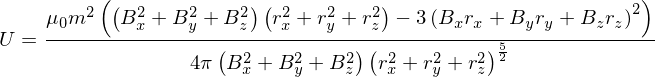

In [118]:
expr_U.simplify()

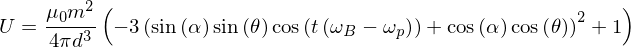

In [119]:
expr_U2 = smp.refine(
    expr_U.subs(rx,d*smp.sin(al)*smp.cos(om_p*t))\
        .subs(ry,d*smp.sin(al)*smp.sin(om_p*t))\
        .subs(rz,d*smp.cos(al))\
        .subs(Bx,Babs*smp.sin(th)*smp.cos(om_b*t))\
        .subs(By,Babs*smp.sin(th)*smp.sin(om_b*t))\
        .subs(Bz,Babs*smp.cos(th)).simplify(),smp.Q.positive(d))
expr_U2

Here, we can define $\delta = t(\omega_B-\omega_p)$ as the phase lag between the field $B$ and the dimer phase. 
<img src="DeltaDefinition.png", width="256px">

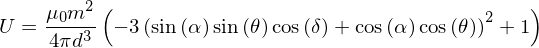

In [120]:
expr_U3 = expr_U2.subs(t,dl/(om_B-om_p))
expr_U3

The Torque $M$ is the torque that one particle applies on the other particle, and it is obtained by the expression:
$$M = \frac{\partial U}{\partial \delta}$$


In [121]:
M = smp.symbols(r'M')

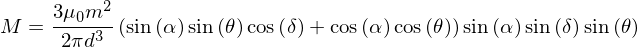

In [122]:
expr_M = smp.Eq(M,smp.diff(expr_U3.rhs,dl))
expr_M

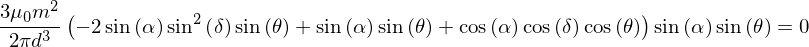

In [137]:
smp.Eq(smp.diff(expr_M.rhs,dl).simplify(),0)

In [135]:
expr_dl1 = smp.solveset(smp.Eq(smp.diff(expr_M.rhs,dl),0),dl)
expr_dl1

In [134]:
expr_dl1.args[1]